# STUDIO PROJECT: IAAC
### Evaluation of Public Space
### Students: Sachin Dabas, Pedro , Sergey and Yara

# IMPORT LIBRARIES

In [ ]:
import pandas as pd
import seaborn as sns
import altair as alt
import tensorflow as tf
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
import string 
from wordcloud import WordCloud, STOPWORDS
from glob import glob #for multiple csv files upload
import numpy as np

sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


In [ ]:
pip install pyLDAvis

In [ ]:
import spacy
import gensim
from gensim import corpora

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
print("imports ok")

imports ok


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/STUDIO /New York/Foley square.csv', na_values = 'n/a', usecols= ['section-review-text']) #load file

pd.options.display.max_columns = None
df

,section-review-text
0,Nice old buildings In fact all of N Y C needs to be cleaner
1,Such a iconic place.. I loved skating here!
2,They need to take better care of the African burial ground memorial. It's fading.Nice area. Visi...
3,It’s really peaceful at night #niceView
4,Nice architecture and historical building in this area.
...,...
505,(Translated by Google) Beautiful place(Original)Hermoso lugar
506,(Translated by Google) Very good!!(Original)Muito bom!!
507,(Translated by Google) Beautiful place(Original)Hermoso lugar
508,(Translated by Google) The great architecture(Original)La arquitectura genial


# CLEAN DATASET

In [ ]:
df = df[df['section-review-text'].isna() == False] #remove nan values
df

,section-review-text
0,Nice old buildings In fact all of N Y C needs to be cleaner
1,Such a iconic place.. I loved skating here!
2,They need to take better care of the African burial ground memorial. It's fading.Nice area. Visi...
3,It’s really peaceful at night #niceView
4,Nice architecture and historical building in this area.
...,...
505,(Translated by Google) Beautiful place(Original)Hermoso lugar
506,(Translated by Google) Very good!!(Original)Muito bom!!
507,(Translated by Google) Beautiful place(Original)Hermoso lugar
508,(Translated by Google) The great architecture(Original)La arquitectura genial


# REMOVING PUNCTUATION

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(txt):
    txt_nopunt = "".join( [c for c in txt if c not in string.punctuation] )
    return txt_nopunt

In [ ]:
df['section-review-text'] = df['section-review-text'].apply( lambda x: remove_punctuation(x))
pd.set_option('display.max_colwidth', 100) #increase width
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,section-review-text
0,Nice old buildings In fact all of N Y C needs to be cleaner
1,Such a iconic place I loved skating here
2,They need to take better care of the African burial ground memorial Its fadingNice area Visit St...
3,It’s really peaceful at night niceView
4,Nice architecture and historical building in this area
...,...
505,Translated by Google Beautiful placeOriginalHermoso lugar
506,Translated by Google Very goodOriginalMuito bom
507,Translated by Google Beautiful placeOriginalHermoso lugar
508,Translated by Google The great architectureOriginalLa arquitectura genial


# TOKENIZE

In [ ]:
#pre-processing
#tokenize
import re

def tokenize(txt):
    tokens = re.split('\W+', txt)
    return tokens

df['tokenized'] = df['section-review-text'].apply(lambda x: tokenize(x.lower()))

pd.set_option('display.max_colwidth', 100) #increase width
df

<input>:6: DeprecationWarning: invalid escape sequence \W
<input>:6: DeprecationWarning: invalid escape sequence \W
<input>:6: DeprecationWarning: invalid escape sequence \W
<input>:6: DeprecationWarning: invalid escape sequence \W
<input>:6: DeprecationWarning: invalid escape sequence \W
<input>:6: DeprecationWarning: invalid escape sequence \W
<input>:6: DeprecationWarning: invalid escape sequence \W
<ipython-input-95-72c2d4c2c423>:6: DeprecationWarning: invalid escape sequence \W
  tokens = re.split('\W+', txt)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,section-review-text,tokenized
0,Nice old buildings In fact all of N Y C needs to be cleaner,"[nice, old, buildings, in, fact, all, of, n, y, c, needs, to, be, cleaner]"
1,Such a iconic place I loved skating here,"[such, a, iconic, place, i, loved, skating, here]"
2,They need to take better care of the African burial ground memorial Its fadingNice area Visit St...,"[they, need, to, take, better, care, of, the, african, burial, ground, memorial, its, fadingnice..."
3,It’s really peaceful at night niceView,"[it, s, really, peaceful, at, night, niceview]"
4,Nice architecture and historical building in this area,"[nice, architecture, and, historical, building, in, this, area]"
...,...,...
505,Translated by Google Beautiful placeOriginalHermoso lugar,"[translated, by, google, beautiful, placeoriginalhermoso, lugar]"
506,Translated by Google Very goodOriginalMuito bom,"[translated, by, google, very, goodoriginalmuito, bom]"
507,Translated by Google Beautiful placeOriginalHermoso lugar,"[translated, by, google, beautiful, placeoriginalhermoso, lugar]"
508,Translated by Google The great architectureOriginalLa arquitectura genial,"[translated, by, google, the, great, architectureoriginalla, arquitectura, genial]"


# STOP WORDS

In [ ]:
import pandas as pd
import re
import string
import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
stopwords[0:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

In [ ]:
df['no_stopwords'] = df['tokenized'].apply(lambda x: remove_stopwords(x))
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,section-review-text,tokenized,no_stopwords
0,Nice old buildings In fact all of N Y C needs to be cleaner,"[nice, old, buildings, in, fact, all, of, n, y, c, needs, to, be, cleaner]","[nice, old, buildings, fact, n, c, needs, cleaner]"
1,Such a iconic place I loved skating here,"[such, a, iconic, place, i, loved, skating, here]","[iconic, place, loved, skating]"
2,They need to take better care of the African burial ground memorial Its fadingNice area Visit St...,"[they, need, to, take, better, care, of, the, african, burial, ground, memorial, its, fadingnice...","[need, take, better, care, african, burial, ground, memorial, fadingnice, area, visit, story, co..."
3,It’s really peaceful at night niceView,"[it, s, really, peaceful, at, night, niceview]","[really, peaceful, night, niceview]"
4,Nice architecture and historical building in this area,"[nice, architecture, and, historical, building, in, this, area]","[nice, architecture, historical, building, area]"


# STEMMING

In [ ]:
import nltk 
from nltk.stem import PorterStemmer
ps = PorterStemmer() #create object 
dir(ps) # check functions

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

In [ ]:
def clean_text(txt):
    txt = " ".join( [c for c in txt if c not in string.punctuation] )
    tokens = re.split('\W+', txt)
    txt = [ps.stem(word) for word in tokens if word not in stopwords ]
    return txt

<input>:3: DeprecationWarning: invalid escape sequence \W
<input>:3: DeprecationWarning: invalid escape sequence \W
<input>:3: DeprecationWarning: invalid escape sequence \W
<ipython-input-100-24b99a7072de>:3: DeprecationWarning: invalid escape sequence \W
  tokens = re.split('\W+', txt)


In [ ]:
""" df['no_stopwords'] = df['no_stopwords'].apply(lambda x: clean_text(x) )
df """

" df['no_stopwords'] = df['no_stopwords'].apply(lambda x: clean_text(x) )\ndf "

In [ ]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [ ]:
df['stemmed'] = df['no_stopwords'].apply(lambda x: stemming(x))
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,section-review-text,tokenized,no_stopwords,stemmed
0,Nice old buildings In fact all of N Y C needs to be cleaner,"[nice, old, buildings, in, fact, all, of, n, y, c, needs, to, be, cleaner]","[nice, old, buildings, fact, n, c, needs, cleaner]","[nice, old, build, fact, n, c, need, cleaner]"
1,Such a iconic place I loved skating here,"[such, a, iconic, place, i, loved, skating, here]","[iconic, place, loved, skating]","[icon, place, love, skate]"
2,They need to take better care of the African burial ground memorial Its fadingNice area Visit St...,"[they, need, to, take, better, care, of, the, african, burial, ground, memorial, its, fadingnice...","[need, take, better, care, african, burial, ground, memorial, fadingnice, area, visit, story, co...","[need, take, better, care, african, burial, ground, memori, fadingnic, area, visit, stori, corp,..."
3,It’s really peaceful at night niceView,"[it, s, really, peaceful, at, night, niceview]","[really, peaceful, night, niceview]","[realli, peac, night, niceview]"
4,Nice architecture and historical building in this area,"[nice, architecture, and, historical, building, in, this, area]","[nice, architecture, historical, building, area]","[nice, architectur, histor, build, area]"
...,...,...,...,...
505,Translated by Google Beautiful placeOriginalHermoso lugar,"[translated, by, google, beautiful, placeoriginalhermoso, lugar]","[translated, google, beautiful, placeoriginalhermoso, lugar]","[translat, googl, beauti, placeoriginalhermoso, lugar]"
506,Translated by Google Very goodOriginalMuito bom,"[translated, by, google, very, goodoriginalmuito, bom]","[translated, google, goodoriginalmuito, bom]","[translat, googl, goodoriginalmuito, bom]"
507,Translated by Google Beautiful placeOriginalHermoso lugar,"[translated, by, google, beautiful, placeoriginalhermoso, lugar]","[translated, google, beautiful, placeoriginalhermoso, lugar]","[translat, googl, beauti, placeoriginalhermoso, lugar]"
508,Translated by Google The great architectureOriginalLa arquitectura genial,"[translated, by, google, the, great, architectureoriginalla, arquitectura, genial]","[translated, google, great, architectureoriginalla, arquitectura, genial]","[translat, googl, great, architectureoriginalla, arquitectura, genial]"


# LEMMATIZATION

In [ ]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
dir(wn)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 'lemmatize',
 'unicode_repr']

In [ ]:
def lemmatization(token_txt):
    text = [wn.lemmatize(word) for word in token_txt]
    return text

In [ ]:
df['lemmatized'] = df['no_stopwords'].apply(lambda x: lemmatization(x))
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,section-review-text,tokenized,no_stopwords,stemmed,lemmatized
0,Nice old buildings In fact all of N Y C needs to be cleaner,"[nice, old, buildings, in, fact, all, of, n, y, c, needs, to, be, cleaner]","[nice, old, buildings, fact, n, c, needs, cleaner]","[nice, old, build, fact, n, c, need, cleaner]","[nice, old, building, fact, n, c, need, cleaner]"
1,Such a iconic place I loved skating here,"[such, a, iconic, place, i, loved, skating, here]","[iconic, place, loved, skating]","[icon, place, love, skate]","[iconic, place, loved, skating]"
2,They need to take better care of the African burial ground memorial Its fadingNice area Visit St...,"[they, need, to, take, better, care, of, the, african, burial, ground, memorial, its, fadingnice...","[need, take, better, care, african, burial, ground, memorial, fadingnice, area, visit, story, co...","[need, take, better, care, african, burial, ground, memori, fadingnic, area, visit, stori, corp,...","[need, take, better, care, african, burial, ground, memorial, fadingnice, area, visit, story, co..."
3,It’s really peaceful at night niceView,"[it, s, really, peaceful, at, night, niceview]","[really, peaceful, night, niceview]","[realli, peac, night, niceview]","[really, peaceful, night, niceview]"
4,Nice architecture and historical building in this area,"[nice, architecture, and, historical, building, in, this, area]","[nice, architecture, historical, building, area]","[nice, architectur, histor, build, area]","[nice, architecture, historical, building, area]"
...,...,...,...,...,...
505,Translated by Google Beautiful placeOriginalHermoso lugar,"[translated, by, google, beautiful, placeoriginalhermoso, lugar]","[translated, google, beautiful, placeoriginalhermoso, lugar]","[translat, googl, beauti, placeoriginalhermoso, lugar]","[translated, google, beautiful, placeoriginalhermoso, lugar]"
506,Translated by Google Very goodOriginalMuito bom,"[translated, by, google, very, goodoriginalmuito, bom]","[translated, google, goodoriginalmuito, bom]","[translat, googl, goodoriginalmuito, bom]","[translated, google, goodoriginalmuito, bom]"
507,Translated by Google Beautiful placeOriginalHermoso lugar,"[translated, by, google, beautiful, placeoriginalhermoso, lugar]","[translated, google, beautiful, placeoriginalhermoso, lugar]","[translat, googl, beauti, placeoriginalhermoso, lugar]","[translated, google, beautiful, placeoriginalhermoso, lugar]"
508,Translated by Google The great architectureOriginalLa arquitectura genial,"[translated, by, google, the, great, architectureoriginalla, arquitectura, genial]","[translated, google, great, architectureoriginalla, arquitectura, genial]","[translat, googl, great, architectureoriginalla, arquitectura, genial]","[translated, google, great, architectureoriginalla, arquitectura, genial]"


# COUNT VECTORIZER

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(analyzer=clean_text)
X = cv1.fit_transform(df['lemmatized'])
print(X.shape)

(437, 797)


In [ ]:
print(cv1.get_feature_names())

['', '010920', '10', '1st', '2017', '2019', '20th', '26', '2nd', '3', '360', '4', '5', '8', '80', '911', 'absolu', 'absolutelyoriginaltr', 'access', 'accommod', 'across', 'action', 'activ', 'activist', 'actual', 'ad', 'administr', 'admir', 'afford', 'african', 'afternoon', 'age', 'ago', 'agrad', 'aii', 'alot', 'also', 'although', 'alway', 'amaz', 'ambienc', 'america', 'american', 'ammend', 'ancient', 'anoth', 'anybodi', 'anyth', 'anywher', 'appreci', 'architectur', 'architectureoriginalla', 'area', 'around', 'arquitectura', 'art', 'assassin', 'assembl', 'assign', 'atmospher', 'attend', 'august', 'avail', 'away', 'awesom', 'back', 'backdrop', 'background', 'bad', 'bail', 'band', 'barricad', 'barzini', 'beau', 'beauti', 'beautifuloriginalamei', 'begin', 'bench', 'best', 'better', 'bien', 'big', 'bike', 'bird', 'bit', 'block', 'bloodsth', 'blue', 'bluff', 'bodi', 'bom', 'bomb', 'bonito', 'break', 'bridg', 'broadway', 'brooklyn', 'brown', 'bu', 'build', 'buildingloc', 'buildingsso', 'built

In [ ]:
#data_sample = df[0:10]
cv2 = CountVectorizer(analyzer = clean_text)

X = cv2.fit_transform(df['lemmatized'])
print(X.shape)

(437, 797)


In [ ]:
df1 = pd.DataFrame(X.toarray(),  columns=cv2.get_feature_names())
df1

,,010920,10,1st,2017,2019,20th,26,2nd,3,360,4,5,8,80,911,absolu,absolutelyoriginaltr,access,accommod,across,action,activ,activist,actual,ad,administr,admir,afford,african,afternoon,age,ago,agrad,aii,alot,also,although,alway,amaz,ambienc,america,american,ammend,ancient,anoth,anybodi,anyth,anywher,appreci,architectur,architectureoriginalla,area,around,arquitectura,art,assassin,assembl,assign,atmospher,attend,august,avail,away,awesom,back,backdrop,background,bad,bail,band,barricad,barzini,beau,beauti,beautifuloriginalamei,begin,bench,best,better,bien,big,bike,bird,bit,block,bloodsth,blue,bluff,bodi,bom,bomb,bonito,break,bridg,broadway,brooklyn,brown,bu,build,buildingloc,buildingsso,built,burial,busi,bypass,c,calm,came,cant,capit,car,care,case,cash,catskil,caus,ce,center,central,centrea,centuri,challeng,chamber,chang,chapter,chat,chi,child,china,chinatown,chines,citi,città,cityoriginalbellissima,civic,classroom,clean,cleaner,climat,climatestrik,close,collect,come,comfort,common,commun,complet,congest,consid,constant,construct,constructionoriginalconstruccion,continu,control,conveni,convers,cool,cooloriginalmuito,corner,corp,corral,corrupt,cort,could,couldnt,counti,countri,coupl,court,courteou,courthous,courtoriginallindo,courtroom,coversnic,craze,creat,crime,crossroad,crowd,cute,cycl,dam,daughter,day,decent,decid,definit,demand,demonstr,dens,desk,destruct,detail,di,differ,dirti,disabl,disrupt,distanc,distinta,district,divers,doesnt,dollar,dome,dond,dont,dontgother,downtown,dream,drink,drive,due,dull,dun,duti,earli,earth,easi,eat,effect,effici,empir,empti,encantó,end,engag,enjoy,enough,euro,europ,even,event,ever,everybodi,everyday,everyon,everyth,everywher,evict,excel,excellentoriginalbello,excellentoriginalótimo,excit,exelent,expect,exquisit,extra,fabul,fact,fadingnic,fallpool,famili,famou,fan,fantast,far,fast,feder,feel,felt,ferri,fill,film,financi,find,finest,finger,firmest,first,five,flip,foley,folk,food,foot,forget,found,fountain,four,free,freedom,frent,friday,friend,friendli,frigid,front,full,fun,funnel,futur,gather,genial,genuin,get,gild,give,go,godfath,good,goodoriginalmuito,googl,gorgeou,got,govern,government,grabado,graffiti,great,green,grind,groovi,ground,guess,hall,han,handsomeoriginalhermoso,hang,happen,hard,hate,hear,heart,heck,hello,help,hereev,hereit,hey,high,hipster,histor,histori,historioriginalcon,historytim,hold,homeless,hope,horribl,hot,hous,hub,huge,human,hundr,hustl,icon,idea,idiot,im,immedi,immigr,import,impress,improv,incred,info,insid,insight,instead,institut,interest,iran,isnt,itali,itsniceplac,jacob,jajah,jam,jame,jan,januari,javit,job,joli,judg,judici,juri,juror,justic,kan,keep,kick,kid,kidney,kill,kind,kinda,la,lafayett,landmark,landscapeoriginalmuy,larg,late,lateregnyc,law,lawn,learn,least,legal,liber,liberti,lieu,life,light,like,lindo,line,littl,live,local,locat,lol,look,lot,love,lovedoriginalm,lower,lugar,lunch,luxir,luxuri,magnific,magnificentoriginal这个地方好多古建筑好宏伟,mainten,majest,make,manhattan,manhattanoriginalmanhattan,manhol,mani,manifest,march,marvel,mass,matter,meet,memor,memori,mess,middl,might,mighti,mile,millenni,min,mind,minorit,moder,moment,money,moratorium,morn,mountain,move,movi,much,must,n,na,name,natur,navig,nazilik,near,nearbi,nearli,neat,need,neighborhood,never,new,nice,niceoriginallindo,niceview,night,nj,noth,numer,ny,nyc,occasion,occur,offic,often,ok,ol,old,om,one,open,opportun,order,originalמקום,otherwis,outlet,overal,pa,paisej,pant,park,parkoriginaltrevlig,part,particular,past,peac,pedestrian,pee,peopl,perfect,perform,period,phibetasigma,photo,photographi,pic,pictur,picturesqu,pillar,pit,place,placeoriginalbuenisimo,placeoriginalhermoso,placeoriginalimportant,placeoriginallindo,placeoriginalmuy,placeoriginalrealment,placeoriginaltrè,planet,plaster,play,plaza,plenti,point,polic,polit,power,prefer,premier,present,preserv,preservedeverybuild,press,pretti,prettyoriginalmuy,problem,profession,profil,prosecutor,protest,protestprotect,protestrallymarch,proud,proxim,public,pure,qualiti,qu

In [ ]:
df1.to_pickle("dfc.pkl") # pickle data for later use

In [ ]:
df.to_pickle("df.pkl") # pickle before vectorization data for later use

# TF-IDF (not required)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer=clean_text)

X = tfidf.fit_transform(df['lemmatized'])
df


,section-review-text,tokenized,no_stopwords,stemmed,lemmatized
0,Nice old buildings In fact all of N Y C needs to be cleaner,"[nice, old, buildings, in, fact, all, of, n, y, c, needs, to, be, cleaner]","[nice, old, buildings, fact, n, c, needs, cleaner]","[nice, old, build, fact, n, c, need, cleaner]","[nice, old, building, fact, n, c, need, cleaner]"
1,Such a iconic place I loved skating here,"[such, a, iconic, place, i, loved, skating, here]","[iconic, place, loved, skating]","[icon, place, love, skate]","[iconic, place, loved, skating]"
2,They need to take better care of the African burial ground memorial Its fadingNice area Visit St...,"[they, need, to, take, better, care, of, the, african, burial, ground, memorial, its, fadingnice...","[need, take, better, care, african, burial, ground, memorial, fadingnice, area, visit, story, co...","[need, take, better, care, african, burial, ground, memori, fadingnic, area, visit, stori, corp,...","[need, take, better, care, african, burial, ground, memorial, fadingnice, area, visit, story, co..."
3,It’s really peaceful at night niceView,"[it, s, really, peaceful, at, night, niceview]","[really, peaceful, night, niceview]","[realli, peac, night, niceview]","[really, peaceful, night, niceview]"
4,Nice architecture and historical building in this area,"[nice, architecture, and, historical, building, in, this, area]","[nice, architecture, historical, building, area]","[nice, architectur, histor, build, area]","[nice, architecture, historical, building, area]"
...,...,...,...,...,...
505,Translated by Google Beautiful placeOriginalHermoso lugar,"[translated, by, google, beautiful, placeoriginalhermoso, lugar]","[translated, google, beautiful, placeoriginalhermoso, lugar]","[translat, googl, beauti, placeoriginalhermoso, lugar]","[translated, google, beautiful, placeoriginalhermoso, lugar]"
506,Translated by Google Very goodOriginalMuito bom,"[translated, by, google, very, goodoriginalmuito, bom]","[translated, google, goodoriginalmuito, bom]","[translat, googl, goodoriginalmuito, bom]","[translated, google, goodoriginalmuito, bom]"
507,Translated by Google Beautiful placeOriginalHermoso lugar,"[translated, by, google, beautiful, placeoriginalhermoso, lugar]","[translated, google, beautiful, placeoriginalhermoso, lugar]","[translat, googl, beauti, placeoriginalhermoso, lugar]","[translated, google, beautiful, placeoriginalhermoso, lugar]"
508,Translated by Google The great architectureOriginalLa arquitectura genial,"[translated, by, google, the, great, architectureoriginalla, arquitectura, genial]","[translated, google, great, architectureoriginalla, arquitectura, genial]","[translat, googl, great, architectureoriginalla, arquitectura, genial]","[translated, google, great, architectureoriginalla, arquitectura, genial]"


In [ ]:
df2 = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names())
df2

,,010920,10,1st,2017,2019,20th,26,2nd,3,360,4,5,8,80,911,absolu,absolutelyoriginaltr,access,accommod,across,action,activ,activist,actual,ad,administr,admir,afford,african,afternoon,age,ago,agrad,aii,alot,also,although,alway,amaz,ambienc,america,american,ammend,ancient,anoth,anybodi,anyth,anywher,appreci,architectur,architectureoriginalla,area,around,arquitectura,art,assassin,assembl,assign,atmospher,attend,august,avail,away,awesom,back,backdrop,background,bad,bail,band,barricad,barzini,beau,beauti,beautifuloriginalamei,begin,bench,best,better,bien,big,bike,bird,bit,block,bloodsth,blue,bluff,bodi,bom,bomb,bonito,break,bridg,broadway,brooklyn,brown,bu,build,buildingloc,buildingsso,built,burial,busi,bypass,c,calm,came,cant,capit,car,care,case,cash,catskil,caus,ce,center,central,centrea,centuri,challeng,chamber,chang,chapter,chat,chi,child,china,chinatown,chines,citi,città,cityoriginalbellissima,civic,classroom,clean,cleaner,climat,climatestrik,close,collect,come,comfort,common,commun,complet,congest,consid,constant,construct,constructionoriginalconstruccion,continu,control,conveni,convers,cool,cooloriginalmuito,corner,corp,corral,corrupt,cort,could,couldnt,counti,countri,coupl,court,courteou,courthous,courtoriginallindo,courtroom,coversnic,craze,creat,crime,crossroad,crowd,cute,cycl,dam,daughter,day,decent,decid,definit,demand,demonstr,dens,desk,destruct,detail,di,differ,dirti,disabl,disrupt,distanc,distinta,district,divers,doesnt,dollar,dome,dond,dont,dontgother,downtown,dream,drink,drive,due,dull,dun,duti,earli,earth,easi,eat,effect,effici,empir,empti,encantó,end,engag,enjoy,enough,euro,europ,even,event,ever,everybodi,everyday,everyon,everyth,everywher,evict,excel,excellentoriginalbello,excellentoriginalótimo,excit,exelent,expect,exquisit,extra,fabul,fact,fadingnic,fallpool,famili,famou,fan,fantast,far,fast,feder,feel,felt,ferri,fill,film,financi,find,finest,finger,firmest,first,five,flip,foley,folk,food,foot,forget,found,fountain,four,free,freedom,frent,friday,friend,friendli,frigid,front,full,fun,funnel,futur,gather,genial,genuin,get,gild,give,go,godfath,good,goodoriginalmuito,googl,gorgeou,got,govern,government,grabado,graffiti,great,green,grind,groovi,ground,guess,hall,han,handsomeoriginalhermoso,hang,happen,hard,hate,hear,heart,heck,hello,help,hereev,hereit,hey,high,hipster,histor,histori,historioriginalcon,historytim,hold,homeless,hope,horribl,hot,hous,hub,huge,human,hundr,hustl,icon,idea,idiot,im,immedi,immigr,import,impress,improv,incred,info,insid,insight,instead,institut,interest,iran,isnt,itali,itsniceplac,jacob,jajah,jam,jame,jan,januari,javit,job,joli,judg,judici,juri,juror,justic,kan,keep,kick,kid,kidney,kill,kind,kinda,la,lafayett,landmark,landscapeoriginalmuy,larg,late,lateregnyc,law,lawn,learn,least,legal,liber,liberti,lieu,life,light,like,lindo,line,littl,live,local,locat,lol,look,lot,love,lovedoriginalm,lower,lugar,lunch,luxir,luxuri,magnific,magnificentoriginal这个地方好多古建筑好宏伟,mainten,majest,make,manhattan,manhattanoriginalmanhattan,manhol,mani,manifest,march,marvel,mass,matter,meet,memor,memori,mess,middl,might,mighti,mile,millenni,min,mind,minorit,moder,moment,money,moratorium,morn,mountain,move,movi,much,must,n,na,name,natur,navig,nazilik,near,nearbi,nearli,neat,need,neighborhood,never,new,nice,niceoriginallindo,niceview,night,nj,noth,numer,ny,nyc,occasion,occur,offic,often,ok,ol,old,om,one,open,opportun,order,originalמקום,otherwis,outlet,overal,pa,paisej,pant,park,parkoriginaltrevlig,part,particular,past,peac,pedestrian,pee,peopl,perfect,perform,period,phibetasigma,photo,photographi,pic,pictur,picturesqu,pillar,pit,place,placeoriginalbuenisimo,placeoriginalhermoso,placeoriginalimportant,placeoriginallindo,placeoriginalmuy,placeoriginalrealment,placeoriginaltrè,planet,plaster,play,plaza,plenti,point,polic,polit,power,prefer,premier,present,preserv,preservedeverybuild,press,pretti,prettyoriginalmuy,problem,profession,profil,prosecutor,protest,protestprotect,protestrallymarch,proud,proxim,public,pure,qualiti,qu

# POPULAR WORDS

In [ ]:
#Total sum per column:
df1.transpose()
df1.loc['Total',:]= df1.sum(axis=0)
df1

,,010920,10,1st,2017,2019,20th,26,2nd,3,360,4,5,8,80,911,absolu,absolutelyoriginaltr,access,accommod,across,action,activ,activist,actual,ad,administr,admir,afford,african,afternoon,age,ago,agrad,aii,alot,also,although,alway,amaz,ambienc,america,american,ammend,ancient,anoth,anybodi,anyth,anywher,appreci,architectur,architectureoriginalla,area,around,arquitectura,art,assassin,assembl,assign,atmospher,attend,august,avail,away,awesom,back,backdrop,background,bad,bail,band,barricad,barzini,beau,beauti,beautifuloriginalamei,begin,bench,best,better,bien,big,bike,bird,bit,block,bloodsth,blue,bluff,bodi,bom,bomb,bonito,break,bridg,broadway,brooklyn,brown,bu,build,buildingloc,buildingsso,built,burial,busi,bypass,c,calm,came,cant,capit,car,care,case,cash,catskil,caus,ce,center,central,centrea,centuri,challeng,chamber,chang,chapter,chat,chi,child,china,chinatown,chines,citi,città,cityoriginalbellissima,civic,classroom,clean,cleaner,climat,climatestrik,close,collect,come,comfort,common,commun,complet,congest,consid,constant,construct,constructionoriginalconstruccion,continu,control,conveni,convers,cool,cooloriginalmuito,corner,corp,corral,corrupt,cort,could,couldnt,counti,countri,coupl,court,courteou,courthous,courtoriginallindo,courtroom,coversnic,craze,creat,crime,crossroad,crowd,cute,cycl,dam,daughter,day,decent,decid,definit,demand,demonstr,dens,desk,destruct,detail,di,differ,dirti,disabl,disrupt,distanc,distinta,district,divers,doesnt,dollar,dome,dond,dont,dontgother,downtown,dream,drink,drive,due,dull,dun,duti,earli,earth,easi,eat,effect,effici,empir,empti,encantó,end,engag,enjoy,enough,euro,europ,even,event,ever,everybodi,everyday,everyon,everyth,everywher,evict,excel,excellentoriginalbello,excellentoriginalótimo,excit,exelent,expect,exquisit,extra,fabul,fact,fadingnic,fallpool,famili,famou,fan,fantast,far,fast,feder,feel,felt,ferri,fill,film,financi,find,finest,finger,firmest,first,five,flip,foley,folk,food,foot,forget,found,fountain,four,free,freedom,frent,friday,friend,friendli,frigid,front,full,fun,funnel,futur,gather,genial,genuin,get,gild,give,go,godfath,good,goodoriginalmuito,googl,gorgeou,got,govern,government,grabado,graffiti,great,green,grind,groovi,ground,guess,hall,han,handsomeoriginalhermoso,hang,happen,hard,hate,hear,heart,heck,hello,help,hereev,hereit,hey,high,hipster,histor,histori,historioriginalcon,historytim,hold,homeless,hope,horribl,hot,hous,hub,huge,human,hundr,hustl,icon,idea,idiot,im,immedi,immigr,import,impress,improv,incred,info,insid,insight,instead,institut,interest,iran,isnt,itali,itsniceplac,jacob,jajah,jam,jame,jan,januari,javit,job,joli,judg,judici,juri,juror,justic,kan,keep,kick,kid,kidney,kill,kind,kinda,la,lafayett,landmark,landscapeoriginalmuy,larg,late,lateregnyc,law,lawn,learn,least,legal,liber,liberti,lieu,life,light,like,lindo,line,littl,live,local,locat,lol,look,lot,love,lovedoriginalm,lower,lugar,lunch,luxir,luxuri,magnific,magnificentoriginal这个地方好多古建筑好宏伟,mainten,majest,make,manhattan,manhattanoriginalmanhattan,manhol,mani,manifest,march,marvel,mass,matter,meet,memor,memori,mess,middl,might,mighti,mile,millenni,min,mind,minorit,moder,moment,money,moratorium,morn,mountain,move,movi,much,must,n,na,name,natur,navig,nazilik,near,nearbi,nearli,neat,need,neighborhood,never,new,nice,niceoriginallindo,niceview,night,nj,noth,numer,ny,nyc,occasion,occur,offic,often,ok,ol,old,om,one,open,opportun,order,originalמקום,otherwis,outlet,overal,pa,paisej,pant,park,parkoriginaltrevlig,part,particular,past,peac,pedestrian,pee,peopl,perfect,perform,period,phibetasigma,photo,photographi,pic,pictur,picturesqu,pillar,pit,place,placeoriginalbuenisimo,placeoriginalhermoso,placeoriginalimportant,placeoriginallindo,placeoriginalmuy,placeoriginalrealment,placeoriginaltrè,planet,plaster,play,plaza,plenti,point,polic,polit,power,prefer,premier,present,preserv,preservedeverybuild,press,pretti,prettyoriginalmuy,problem,profession,profil,prosecutor,protest,protestprotect,protestrallymarch,proud,proxim,public,pure,qualiti,qu

In [ ]:
df2 = df1.sort_values(by ='Total', axis=1, ascending=False)
df2

,place,nice,great,translat,googl,beauti,park,good,squar,build,court,area,see,lugar,love,visit,walk,architectur,new,peopl,citi,clean,protest,york,street,foley,ralli,around,go,law,lot,view,take,alway,relax,histori,small,courthous,mani,like,sit,cool,spot,order,peac,brooklyn,dont,bridg,march,look,nyc,pretti,work,old,photo,day,demonstr,surround,fun,amaz,movi,pictur,lunch,realli,summer,subway,locat,kidney,show,tv,crowd,quiet,feder,get,fountain,excel,need,awesom,much,placeoriginalhermoso,suprem,gather,also,time,histor,stop,film,ok,enjoy,littl,point,polit,one,best,justic,make,front,would,govern,must,construct,across,public,quick,interest,ride,right,statu,agrad,eat,bonito,watch,neat,hous,line,lindo,way,placeoriginalmuy,close,near,manhattan,busi,site,activ,woman,hang,stroll,food,servic,part,think,skateboard,hall,safe,differ,big,say,someth,common,never,better,give,admir,american,icon,comfort,reason,local,water,famili,landmark,sight,memori,noth,caus,everyon,went,middl,first,find,impress,tourist,still,five,night,import,step,recommend,originalמקום,famou,otherwis,fantast,pa,paisej,set,sculptur,niceoriginallindo,parkoriginaltrevlig,friendli,short,selfi,free,fact,shoot,seem,frent,fill,hear,scene,insid,placeoriginalbuenisimo,job,judici,kan,kid,kind,kinda,la,landscapeoriginalmuy,larg,prettyoriginalmuy,placeoriginalimportant,meet,liberti,life,placeoriginalrealment,live,plaza,magnificentoriginal这个地方好多古建筑好宏伟,lovedoriginalm,lower,rather,pillar,pedestrian,mind,natur,goodoriginalmuito,gorgeou,got,perfect,sana,guess,handsomeoriginalhermoso,room,hate,move,plenti,restroom,restaur,rest,historioriginalcon,hope,money,idea,photographi,immigr,יפה,social,open,anywher,anyth,traffic,anoth,ancient,wide,courtoriginallindo,svu,creat,bom,break,sure,dam,alot,definit,winter,bu,top,wonderful,stun,child,block,stuff,cort,walkway,come,ton,beautifuloriginalamei,bench,back,avail,constructionoriginalconstruccion,continu,bien,cityoriginalbellissima,well,città,though,welloriginalmuy,thereoriginalseronok,bird,chinatown,that,di,treat,structur,dun,state,effect,year,use,squareoriginalsympa,4,encantó,center,ce,spend,3,even,spectacularoriginalespectacular,special,u,2019,calm,space,ótimo,911,star,took,drink,station,district,stori,world,downtown,dream,worth,due,distinta,wow,usual,polic,uptown,walkout,walkthrough,unless,wall,valley,premier,power,preservedeverybuild,urban,present,wakandaforev,preserv,vehicl,victorian,wait,villain,prefer,press,voir,viscin,usabl,picturesqu,play,perform,within,pee,wonder,wont,past,woodburi,word,particular,wtc,yeah,yesteryear,pant,yet,yorker,overal,outlet,your,zip,zobaczyć,wit,wine,war,window,wara,plaster,planet,warm,placeoriginaltrè,weekend,placeoriginallindo,weird,wellintent,wetland,whatev,where,pit,union,whole,pic,phibetasigma,period,wind,problem,south,underestim,susan,secur,style,second,seaport,suck,se,sunday,sceneri,surpris,surprisingli,system,seeingoriginalwarto,tall,save,sandwich,teacher,team,telli,sadli,sad,tent,ruin,stunt,seen,routin,skate,sooooo,spaciou,solidar,solid,soggi,sober,smh,sleep,speech,spent,squarenyc,storycorp,stair,simpl,start,statement,shoppingmor,shiznit,shade,store,seri,septemb,ther,therewel,unbeliev,true,tranquil,transit,rais,sound,rail,quit,treasur,quickli,qualiti,pure,proxim,readi,truli,proud,protestrallymarch,trump,protestprotect,truth,prosecutor,profil,ugli,profession,random,trade,roman,rememb,road,thought,thursday,review,tile,research,tini,tish,renaiss,remenb,remark,town,reliev,reject,regular,recreat,record,toporiginaltrè,tour,reconstruct,toward,recogn,railroad,,opportun,consid,control,conveni,convers,cooloriginalmuito,corner,corp,corral,corrupt,could,couldnt,counti,countri,coupl,courteou,courtroom,constant,congest,craze,complet,challeng,chamber,chang,chapter,chat,chi,china,chines,civic,classroom,cleaner,climat,climatestrik,collect,commun,coversnic,crime,centrea,dome,dontgother,drive,dull,duti,earli,earth,easi,effici,empir,empti,end,engag,enough,euro,europ,dond,dollar,crossroad,doesnt,cute,cycl,daughter,decent,decid,demand,den

In [ ]:
df_total = df2.loc[['Total']] # List of popular words

In [ ]:
df_total.to_pickle("dfc_Total.pkl") # pickle data for later use

# EDA

ways to explore our data:

01// Top words 
02// Unique words 
03// ...

In [ ]:
#create word clouds for all the public squares
df3 = pd.read_pickle('dfc_Total.pkl')
df3 = df3.transpose()
df3.head(50) #top 50 words

,Total
place,104.0
nice,83.0
great,63.0
translat,62.0
googl,62.0
beauti,51.0
park,34.0
good,28.0
squar,25.0
build,23.0


In [ ]:
df3.iloc[:,:5]

,Total
place,104.0
nice,83.0
great,63.0
translat,62.0
googl,62.0
...,...
hard,1.0
heart,1.0
heck,1.0
hello,1.0


# SENTIMENT ANALYSIS

In [ ]:
data = pd.read_pickle('df.pkl')
data

,section-review-text,tokenized,no_stopwords,stemmed,lemmatized
0,Nice old buildings In fact all of N Y C needs to be cleaner,"[nice, old, buildings, in, fact, all, of, n, y, c, needs, to, be, cleaner]","[nice, old, buildings, fact, n, c, needs, cleaner]","[nice, old, build, fact, n, c, need, cleaner]","[nice, old, building, fact, n, c, need, cleaner]"
1,Such a iconic place I loved skating here,"[such, a, iconic, place, i, loved, skating, here]","[iconic, place, loved, skating]","[icon, place, love, skate]","[iconic, place, loved, skating]"
2,They need to take better care of the African burial ground memorial Its fadingNice area Visit St...,"[they, need, to, take, better, care, of, the, african, burial, ground, memorial, its, fadingnice...","[need, take, better, care, african, burial, ground, memorial, fadingnice, area, visit, story, co...","[need, take, better, care, african, burial, ground, memori, fadingnic, area, visit, stori, corp,...","[need, take, better, care, african, burial, ground, memorial, fadingnice, area, visit, story, co..."
3,It’s really peaceful at night niceView,"[it, s, really, peaceful, at, night, niceview]","[really, peaceful, night, niceview]","[realli, peac, night, niceview]","[really, peaceful, night, niceview]"
4,Nice architecture and historical building in this area,"[nice, architecture, and, historical, building, in, this, area]","[nice, architecture, historical, building, area]","[nice, architectur, histor, build, area]","[nice, architecture, historical, building, area]"
...,...,...,...,...,...
505,Translated by Google Beautiful placeOriginalHermoso lugar,"[translated, by, google, beautiful, placeoriginalhermoso, lugar]","[translated, google, beautiful, placeoriginalhermoso, lugar]","[translat, googl, beauti, placeoriginalhermoso, lugar]","[translated, google, beautiful, placeoriginalhermoso, lugar]"
506,Translated by Google Very goodOriginalMuito bom,"[translated, by, google, very, goodoriginalmuito, bom]","[translated, google, goodoriginalmuito, bom]","[translat, googl, goodoriginalmuito, bom]","[translated, google, goodoriginalmuito, bom]"
507,Translated by Google Beautiful placeOriginalHermoso lugar,"[translated, by, google, beautiful, placeoriginalhermoso, lugar]","[translated, google, beautiful, placeoriginalhermoso, lugar]","[translat, googl, beauti, placeoriginalhermoso, lugar]","[translated, google, beautiful, placeoriginalhermoso, lugar]"
508,Translated by Google The great architectureOriginalLa arquitectura genial,"[translated, by, google, the, great, architectureoriginalla, arquitectura, genial]","[translated, google, great, architectureoriginalla, arquitectura, genial]","[translat, googl, great, architectureoriginalla, arquitectura, genial]","[translated, google, great, architectureoriginalla, arquitectura, genial]"


In [ ]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['section-review-text'].apply(pol)
data['subjectivity'] = data['section-review-text'].apply(sub)

data['polarity'] = data['polarity'].round(decimals=1)
data['subjectivity'] = data['subjectivity'].round(decimals=1)
data.head(250)

,section-review-text,tokenized,no_stopwords,stemmed,lemmatized,polarity,subjectivity
0,Nice old buildings In fact all of N Y C needs to be cleaner,"[nice, old, buildings, in, fact, all, of, n, y, c, needs, to, be, cleaner]","[nice, old, buildings, fact, n, c, needs, cleaner]","[nice, old, build, fact, n, c, need, cleaner]","[nice, old, building, fact, n, c, need, cleaner]",0.4,0.6
1,Such a iconic place I loved skating here,"[such, a, iconic, place, i, loved, skating, here]","[iconic, place, loved, skating]","[icon, place, love, skate]","[iconic, place, loved, skating]",0.4,0.6
2,They need to take better care of the African burial ground memorial Its fadingNice area Visit St...,"[they, need, to, take, better, care, of, the, african, burial, ground, memorial, its, fadingnice...","[need, take, better, care, african, burial, ground, memorial, fadingnice, area, visit, story, co...","[need, take, better, care, african, burial, ground, memori, fadingnic, area, visit, stori, corp,...","[need, take, better, care, african, burial, ground, memorial, fadingnice, area, visit, story, co...",0.2,0.2
3,It’s really peaceful at night niceView,"[it, s, really, peaceful, at, night, niceview]","[really, peaceful, night, niceview]","[realli, peac, night, niceview]","[really, peaceful, night, niceview]",0.2,0.5
4,Nice architecture and historical building in this area,"[nice, architecture, and, historical, building, in, this, area]","[nice, architecture, historical, building, area]","[nice, architectur, histor, build, area]","[nice, architecture, historical, building, area]",0.3,0.5
...,...,...,...,...,...,...,...
256,Nice landmark,"[nice, landmark]","[nice, landmark]","[nice, landmark]","[nice, landmark]",0.6,1.0
257,All court buildings are located here,"[all, court, buildings, are, located, here]","[court, buildings, located]","[court, build, locat]","[court, building, located]",0.0,0.0
258,Its lovely view,"[its, lovely, view]","[lovely, view]","[love, view]","[lovely, view]",0.5,0.8
259,Great spot,"[great, spot]","[great, spot]","[great, spot]","[great, spot]",0.8,0.8


In [ ]:
p = data['polarity'].value_counts() # calculate the polarity counts

In [ ]:
data['polarity'].value_counts() # calculate the polarity counts


 0.0    85
 0.8    72
 0.6    69
 0.4    40
 0.3    34
 0.2    30
 0.5    29
 0.7    24
 1.0    20
 0.1    19
-0.2     5
-0.1     3
-0.4     2
-0.8     2
 0.9     1
-0.3     1
-0.6     1
Name: polarity, dtype: int64

In [ ]:
p1 = p.sort_index()

In [ ]:
s = data['subjectivity'].value_counts() # calculate the polarity counts
# s1 = p.sort_index()

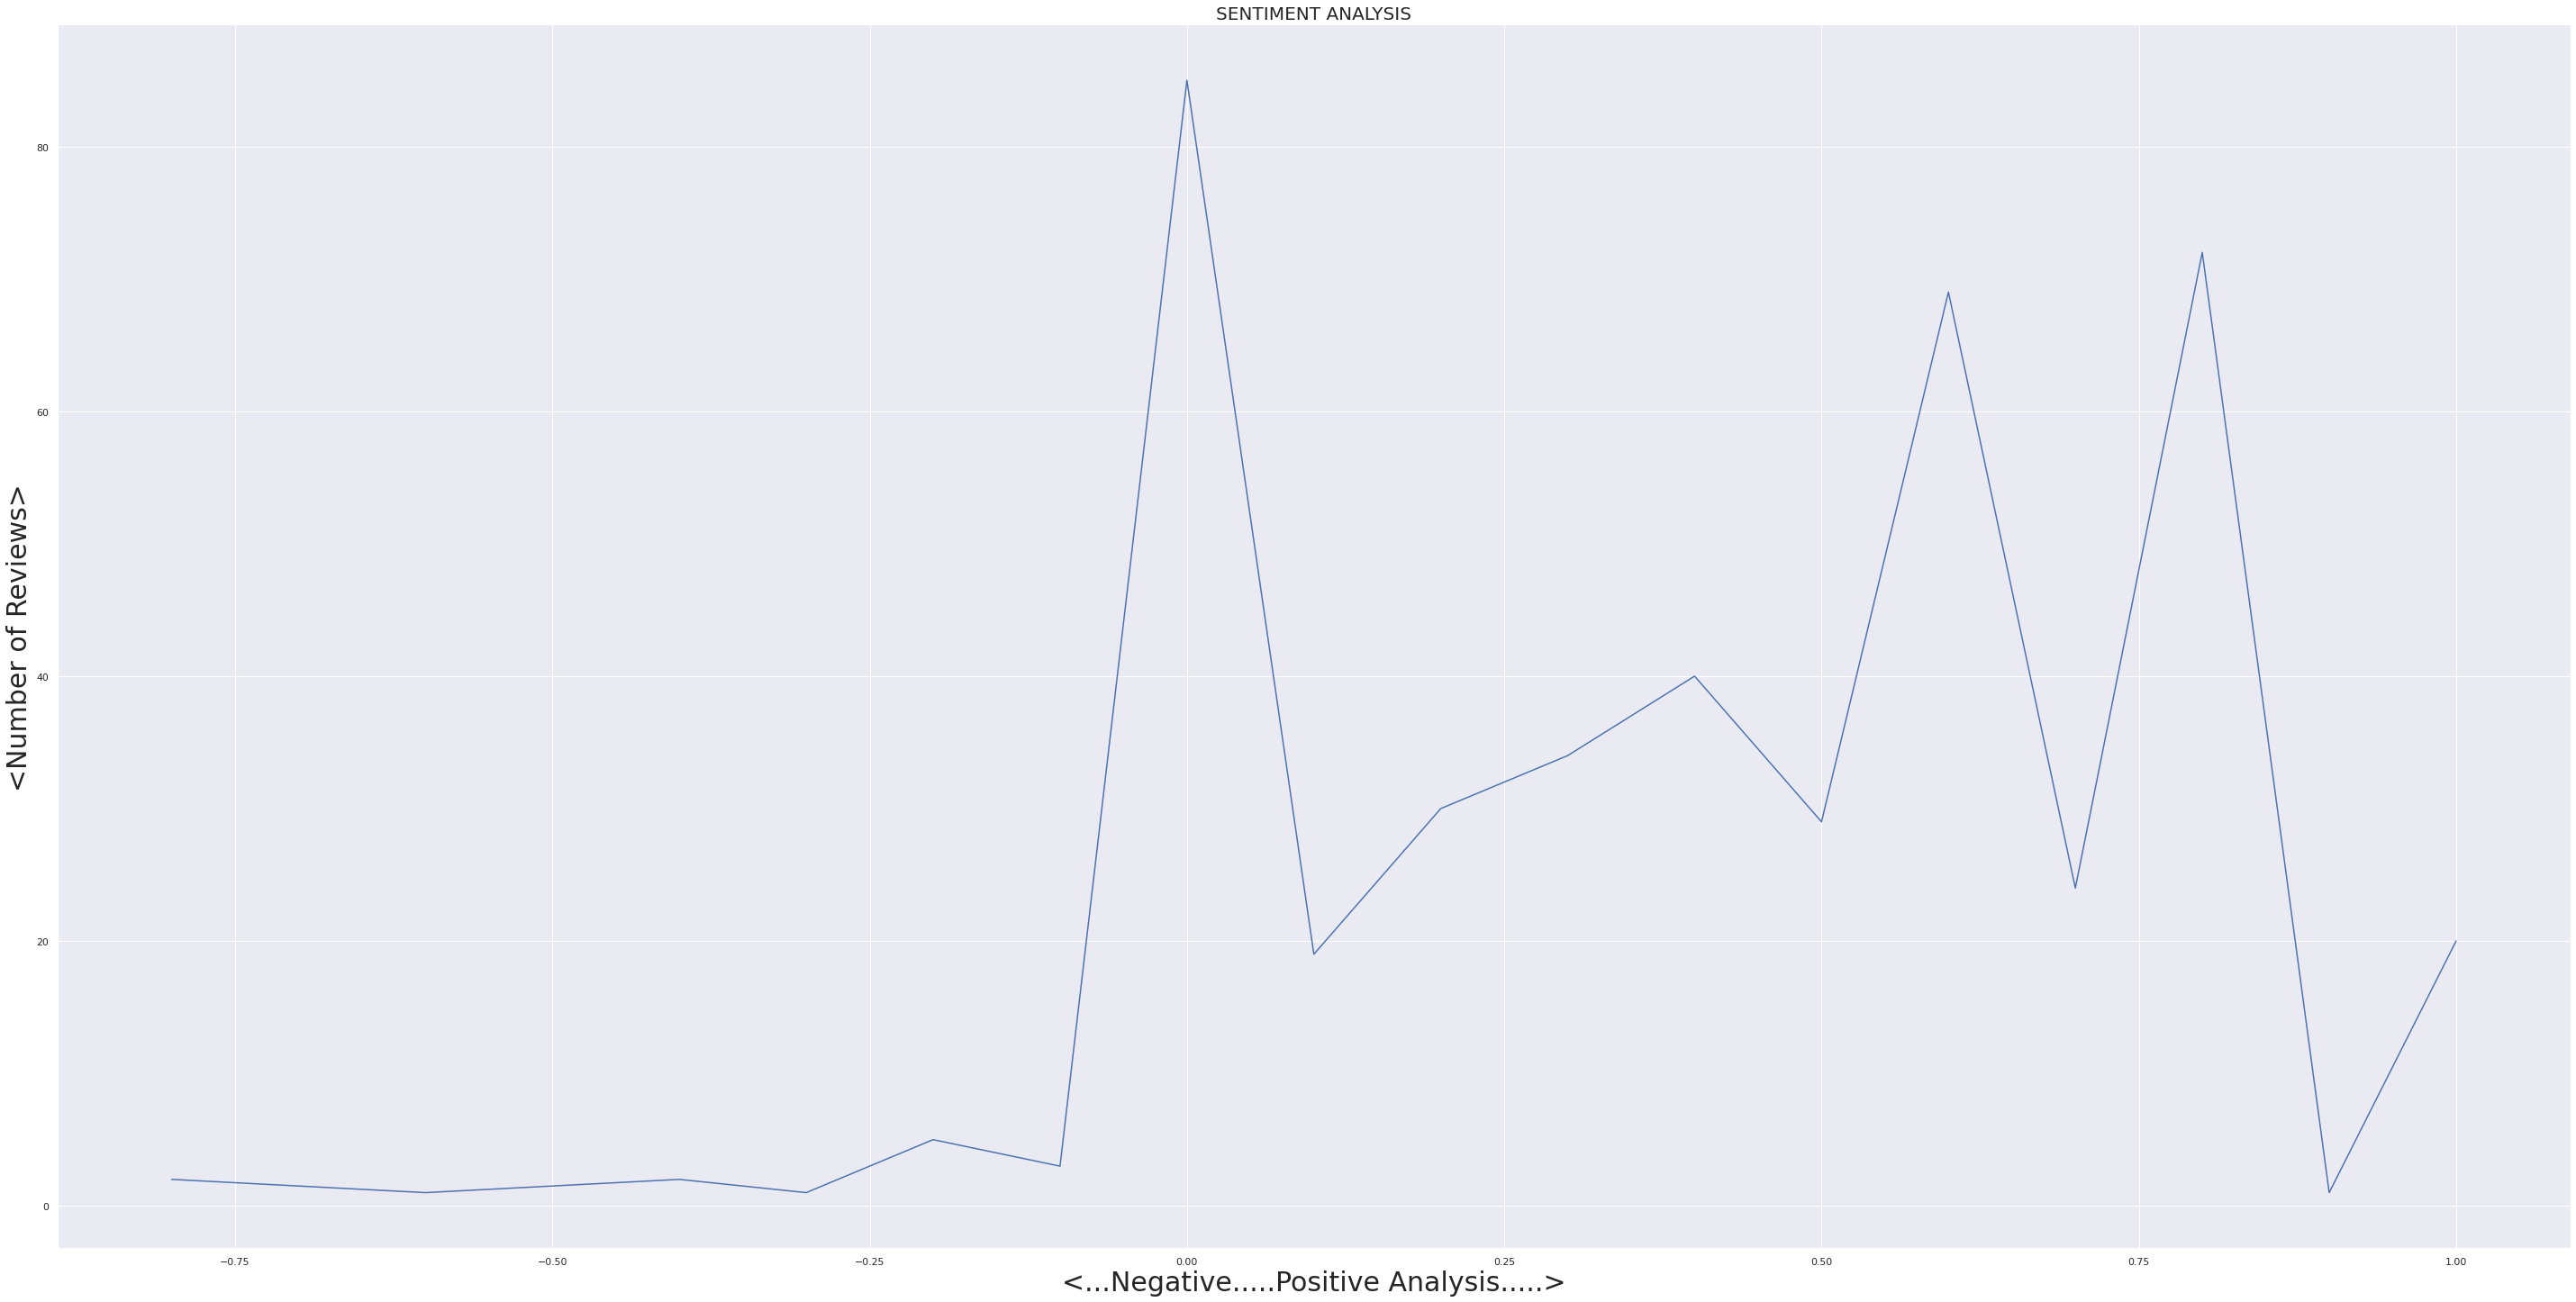

In [ ]:
plt.rcParams['figure.figsize'] = [50,25]
plt.plot(p1)

plt.title('SENTIMENT ANALYSIS', fontsize=20)
plt.xlabel('<...Negative.....Positive Analysis.....>', fontsize=30)
plt.ylabel('<Number of Reviews>', fontsize=30)

plt.show()

In [ ]:
# plt.rcParams['figure.figsize'] = [50,25]
# plt.plot(s1)

# plt.title('Number of Reviews', fontsize=20)
# plt.xlabel('<...Negative.....Positive Analysis.....>', fontsize=15)
# plt.ylabel('<Sentiment>', fontsize=15)

# plt.show()

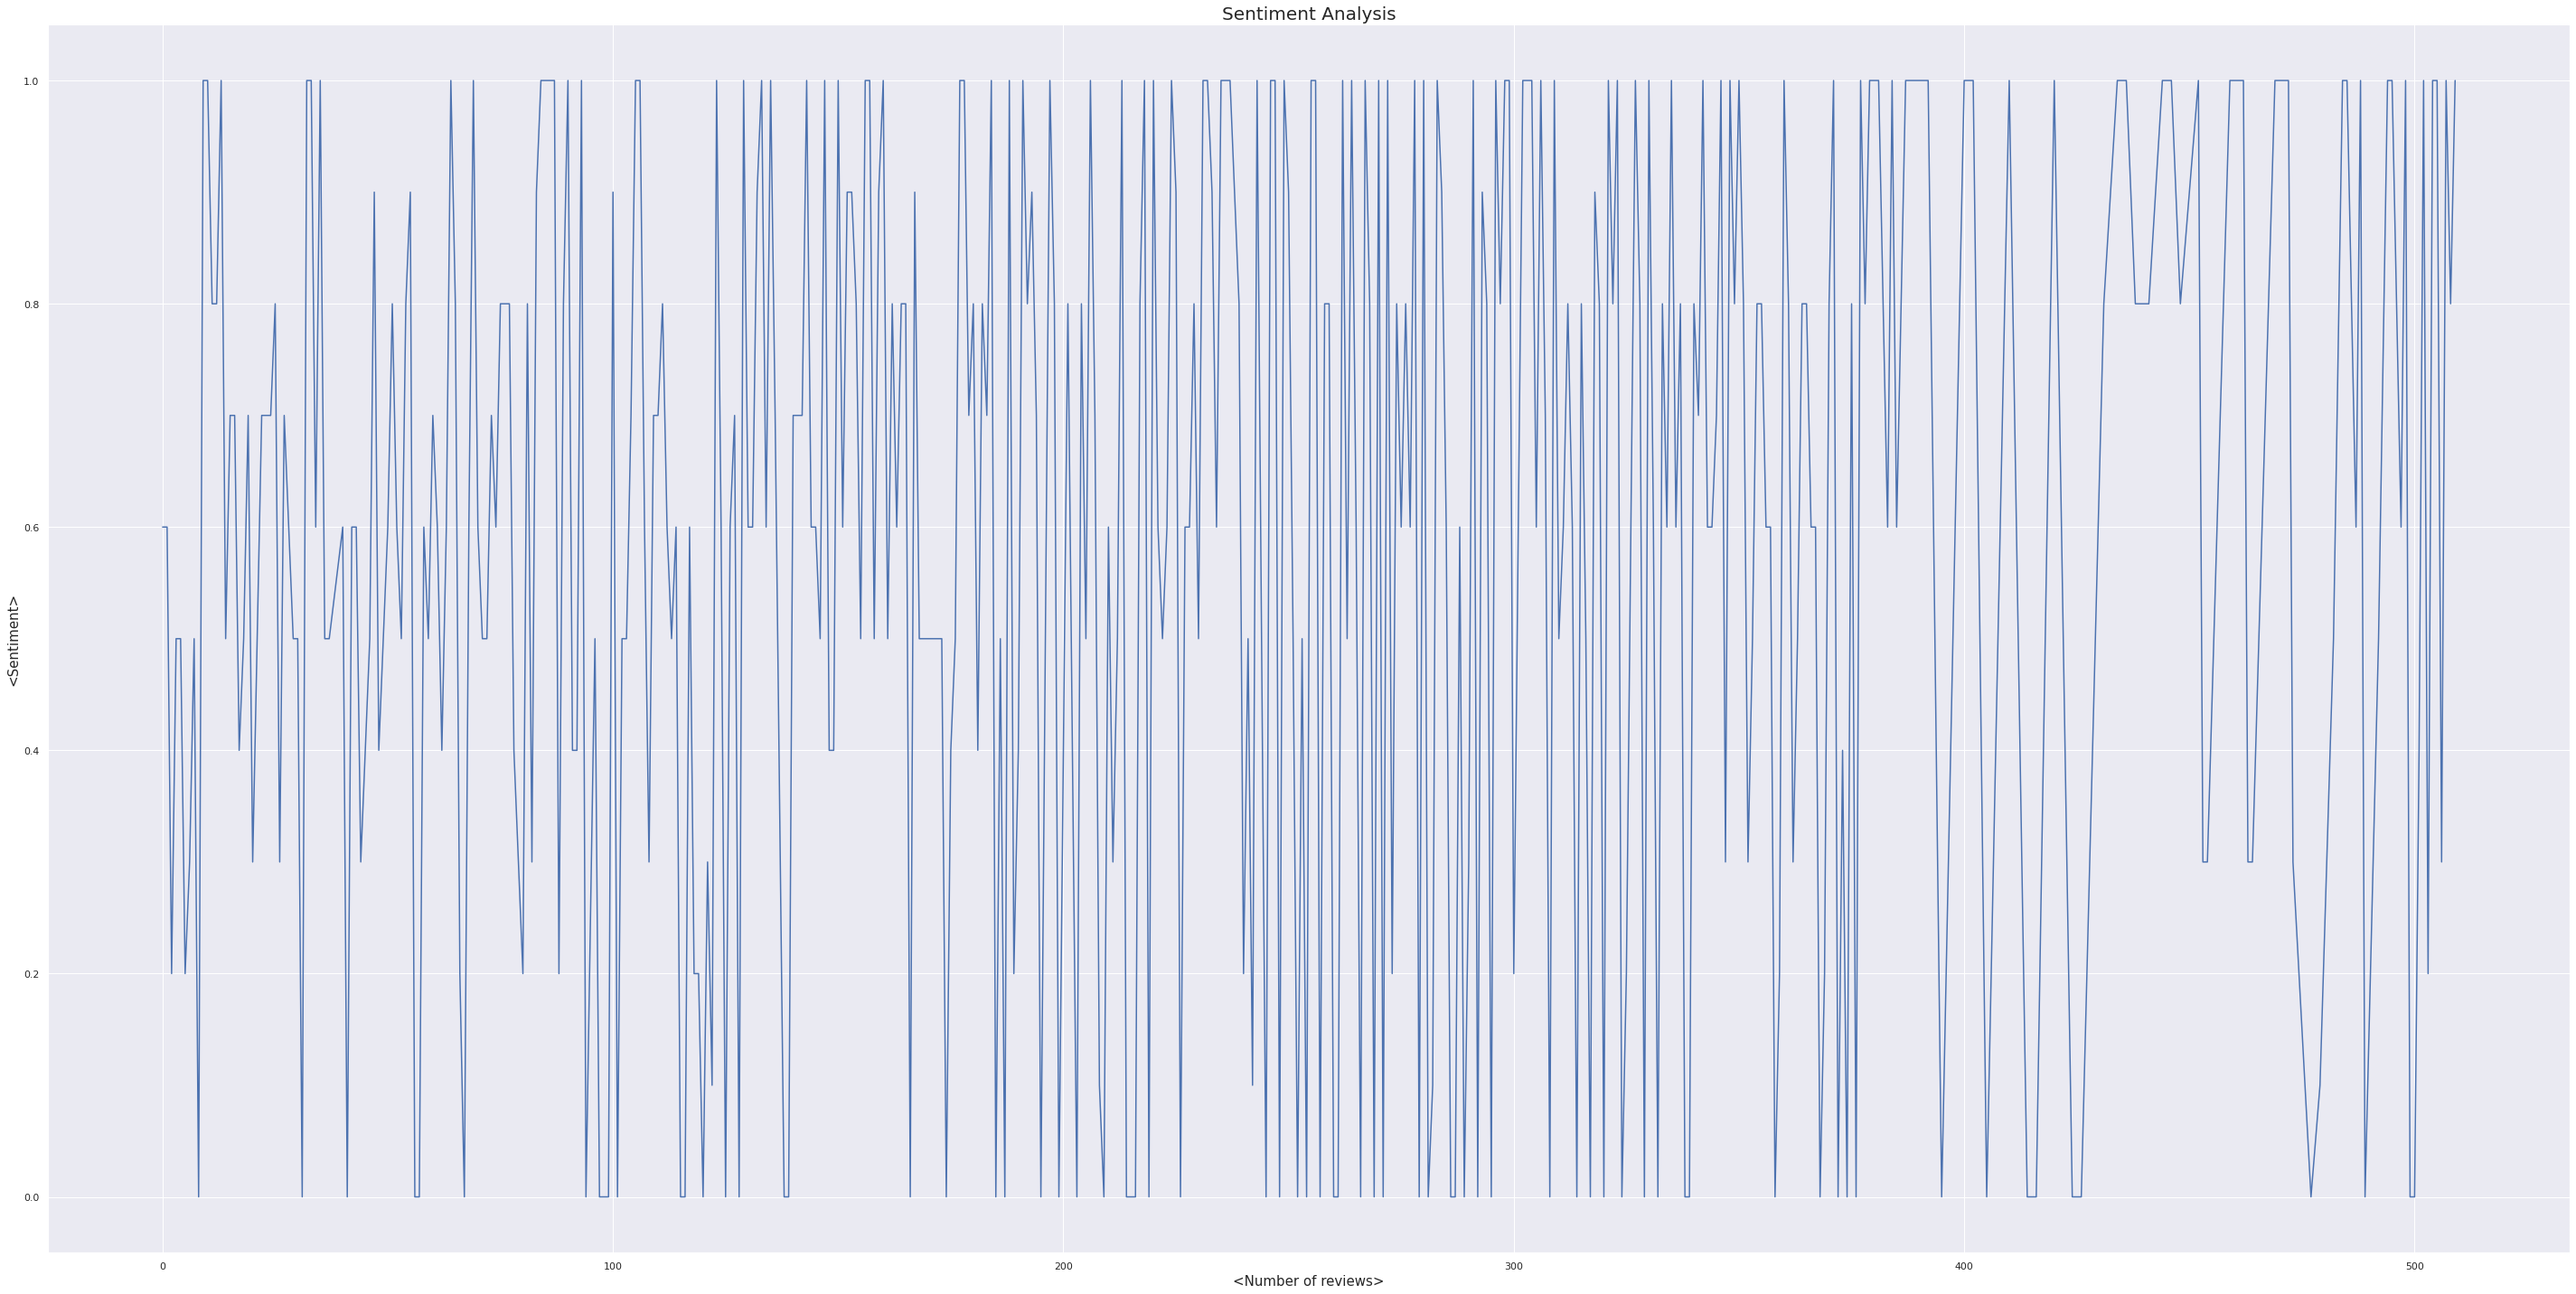

In [ ]:
plt.rcParams['figure.figsize'] = [50,25]
plt.plot(data['subjectivity'])
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<Number of reviews>', fontsize=15)
plt.ylabel('<Sentiment>', fontsize=15)

plt.show()

# TOPIC MODELING

In [ ]:
tokenized_reviews = df['lemmatized']
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [ ]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=4, random_state=100,
                chunksize=100, passes=50,iterations=100)

In [ ]:
lda_model.print_topics()

[(0,
  '0.070*"google" + 0.070*"translated" + 0.038*"good" + 0.020*"lindo" + 0.013*"bonito" + 0.013*"placeoriginalmuy" + 0.013*"loved" + 0.010*"beautifuloriginalamei" + 0.010*"goodoriginalmuito" + 0.010*"bom"'),
 (1,
  '0.099*"translated" + 0.099*"google" + 0.060*"nice" + 0.053*"beautiful" + 0.044*"lugar" + 0.041*"place" + 0.019*"placeoriginalhermoso" + 0.013*"" + 0.013*"pretty" + 0.012*"park"'),
 (2,
  '0.072*"great" + 0.055*"place" + 0.015*"square" + 0.014*"new" + 0.013*"area" + 0.013*"love" + 0.012*"rally" + 0.012*"park" + 0.012*"york" + 0.011*"law"'),
 (3,
  '0.031*"building" + 0.024*"nice" + 0.024*"court" + 0.018*"architecture" + 0.014*"people" + 0.012*"clean" + 0.012*"park" + 0.011*"around" + 0.010*"place" + 0.010*"view"')]

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.148629 -0.041332       1        1  29.731914
3      0.111418  0.003718       2        1  29.412195
1     -0.168737 -0.118349       3        1  24.007943
0     -0.091310  0.155963       4        1  16.847948, topic_info=           Term       Freq      Total Category  logprob  loglift
792  translated  82.000000  82.000000  Default  30.0000  30.0000
789      google  82.000000  82.000000  Default  29.0000  29.0000
108       great  50.000000  50.000000  Default  28.0000  28.0000
6          nice  50.000000  50.000000  Default  27.0000  27.0000
166   beautiful  35.000000  35.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
789      google  27.540424  82.955282   Topic4  -2.6536   0.6783
792  translated  27.540424  82.955282   Topic4  -2.6536   0.6783
183        walk   2.715597   9.245300   Topic4  -4.9702   0.5558
150        spot   2.175472   5.888321   Topic4  -5.1920   0.7852
14         area   2.152199  15.308808   Topic4  -5.2028  -0.1810

[186 rows x 6 columns], token_table=      Topic      Freq                    Term
term                                         
197       2  0.111438                        
197       3  0.891506                        
851       3  0.779635              absolument
852       3  0.779635  absolutelyoriginaltres
248       1  0.715843                activity
...     ...       ...                     ...
451       1  0.830064                   woman
759       3  0.654179                   worth
231       2  0.827155                   would
49        1  0.915230                    york
832       3  0.779626                zobaczyć

[174 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=50, step=1)

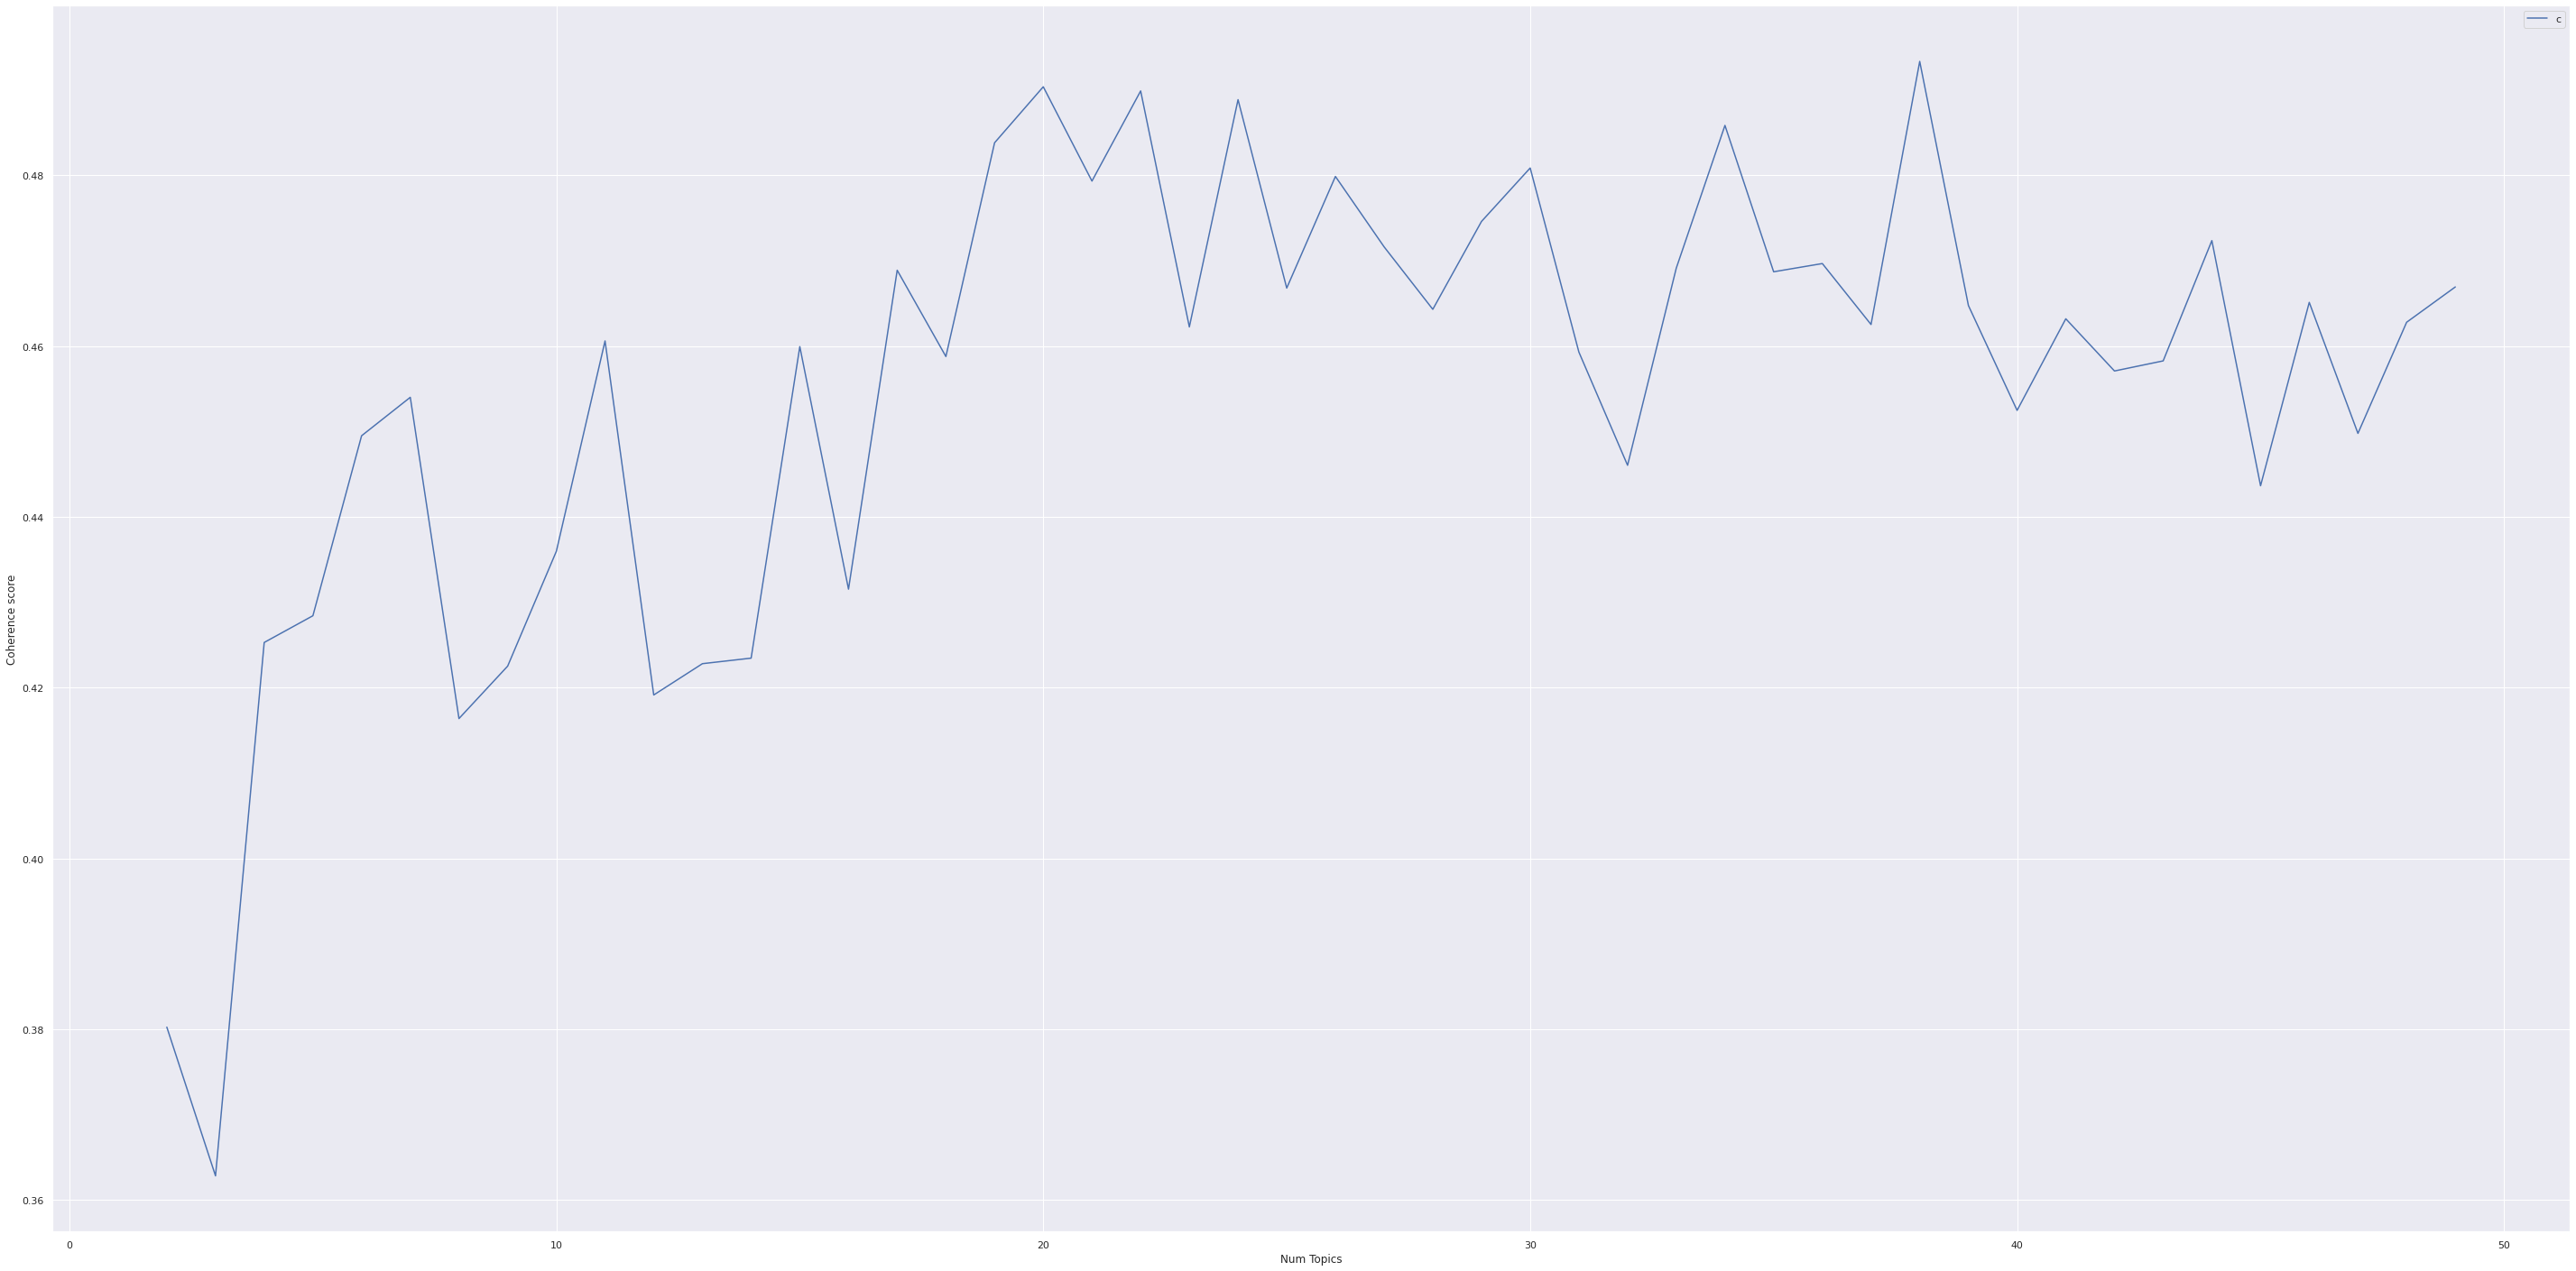

In [ ]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3803
Num Topics = 3  has Coherence Value of 0.3628
Num Topics = 4  has Coherence Value of 0.4253
Num Topics = 5  has Coherence Value of 0.4284
Num Topics = 6  has Coherence Value of 0.4495
Num Topics = 7  has Coherence Value of 0.454
Num Topics = 8  has Coherence Value of 0.4164
Num Topics = 9  has Coherence Value of 0.4225
Num Topics = 10  has Coherence Value of 0.436
Num Topics = 11  has Coherence Value of 0.4606
Num Topics = 12  has Coherence Value of 0.4191
Num Topics = 13  has Coherence Value of 0.4228
Num Topics = 14  has Coherence Value of 0.4235
Num Topics = 15  has Coherence Value of 0.4599
Num Topics = 16  has Coherence Value of 0.4315
Num Topics = 17  has Coherence Value of 0.4689
Num Topics = 18  has Coherence Value of 0.4588
Num Topics = 19  has Coherence Value of 0.4838
Num Topics = 20  has Coherence Value of 0.4904
Num Topics = 21  has Coherence Value of 0.4793
Num Topics = 22  has Coherence Value of 0.4899
Num Topics = 23  has Co

In [ ]:
# Select the model and print the topics
optimal_model = model_list[5]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=17)

[(0,
  '0.034*"place" + 0.034*"nice" + 0.028*"translated" + 0.028*"google" + 0.015*"park" + 0.015*"building" + 0.012*"lot" + 0.012*"walk" + 0.011*"take" + 0.010*"beautiful" + 0.009*"people" + 0.009*"around" + 0.008*"history" + 0.008*"court" + 0.008*"picture" + 0.007*"go" + 0.006*"fun"'),
 (1,
  '0.048*"great" + 0.034*"place" + 0.022*"nice" + 0.021*"beautiful" + 0.019*"park" + 0.014*"good" + 0.014*"court" + 0.012*"google" + 0.012*"translated" + 0.009*"square" + 0.009*"see" + 0.008*"sit" + 0.008*"rally" + 0.008*"clean" + 0.008*"loved" + 0.008*"love" + 0.007*"area"'),
 (2,
  '0.038*"place" + 0.022*"beautiful" + 0.020*"great" + 0.014*"visit" + 0.014*"love" + 0.012*"really" + 0.012*"cool" + 0.011*"area" + 0.009*"walk" + 0.009*"kidney" + 0.009*"photo" + 0.008*"protest" + 0.008*"building" + 0.007*"small" + 0.006*"nice" + 0.006*"google" + 0.006*"translated"'),
 (3,
  '0.042*"translated" + 0.042*"google" + 0.020*"place" + 0.014*"nice" + 0.013*"architecture" + 0.012*"beautiful" + 0.012*"ok" + 0.

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.063900  0.016654       1        1  22.318006
5     -0.013599 -0.101790       2        1  18.734886
1      0.042728 -0.026285       3        1  16.785784
3     -0.098511  0.077673       4        1  12.716558
4     -0.033935 -0.016080       5        1  11.478225
2      0.047195 -0.026481       6        1   9.633338
6      0.120022  0.076310       7        1   8.333204, topic_info=           Term       Freq      Total Category  logprob  loglift
143        good  19.000000  19.000000  Default  30.0000  30.0000
108       great  45.000000  45.000000  Default  29.0000  29.0000
792  translated  46.000000  46.000000  Default  28.0000  28.0000
789      google  46.000000  46.000000  Default  27.0000  27.0000
47       square  19.000000  19.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
49         york   0.891568   9.853829   Topic7  -5.3800   0.0823
268    relaxing   0.771439   2.886271   Topic7  -5.5248   1.1655
46         park   0.864234  25.230523   Topic7  -5.4112  -0.8890
157        love   0.788144   9.827839   Topic7  -5.5033  -0.0384
189       clean   0.778195   8.990210   Topic7  -5.5160   0.0380

[451 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
197       1  0.073119       
197       2  0.584949       
197       4  0.146237       
197       6  0.073119       
197       7  0.073119       
...     ...       ...    ...
49        3  0.202967   york
49        5  0.101483   york
49        7  0.101483   york
300       5  0.701204  youre
632       4  0.713483    zip

[641 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 2, 4, 5, 3, 7])

In [ ]:
corpus = doc_term_matrix

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, corpus, dictionary)
lda_viz.topic_info

,Term,Freq,Total,Category,logprob,loglift
792,translated,82.000000,82.000000,Default,30.0000,30.0000
789,google,82.000000,82.000000,Default,29.0000,29.0000
108,great,50.000000,50.000000,Default,28.0000,28.0000
6,nice,50.000000,50.000000,Default,27.0000,27.0000
166,beautiful,35.000000,35.000000,Default,26.0000,26.0000
...,...,...,...,...,...,...
789,google,27.540639,82.955022,Topic4,-2.6536,0.6783
792,translated,27.540639,82.955022,Topic4,-2.6536,0.6783
183,walk,2.715618,9.245325,Topic4,-4.9702,0.5558
150,spot,2.175489,5.888343,Topic4,-5.1920,0.7852


In [ ]:
lda_viz.sorted_terms(topic=1, _lambda=1)


,Term,Freq,Total,Category,logprob,loglift,relevance
108,great,49.878932,50.453186,Topic1,-2.6276,1.2015,-2.6276
10,place,37.943162,67.921521,Topic1,-2.9011,0.6307,-2.9011
47,square,10.516505,16.048240,Topic1,-4.1843,0.7903,-4.1843
45,new,9.499596,10.050633,Topic1,-4.2860,1.1566,-4.2860
14,area,9.189702,15.308843,Topic1,-4.3192,0.7026,-4.3192
157,love,8.811560,9.362843,Topic1,-4.3612,1.1523,-4.3612
292,rally,8.483146,9.081008,Topic1,-4.3992,1.1448,-4.3992
46,park,8.350925,23.634458,Topic1,-4.4149,0.1726,-4.4149
49,york,8.190587,8.740988,Topic1,-4.4343,1.1479,-4.4343
55,law,7.809708,8.371366,Topic1,-4.4819,1.1435,-4.4819


# PCA

In [ ]:
test_doc = doc_term_matrix[-1]

vector = optimal_model[test_doc]
print (vector)

def Sort(sub_li):
    sub_li.sort(key = lambda x: x[1])
    sub_li.reverse()
    return (sub_li)
new_vector = Sort(vector)
print (new_vector)

[(0, 0.015904004), (1, 0.015899621), (2, 0.015887836), (3, 0.9045672), (4, 0.015949817), (5, 0.015900508), (6, 0.015890956)]
[(3, 0.9045672), (4, 0.015949817), (0, 0.015904004), (5, 0.015900508), (1, 0.015899621), (6, 0.015890956), (2, 0.015887836)]


In [ ]:
n_words = 10

topic_words = pd.DataFrame({})

for i, topic in enumerate(model_list[7].get_topics()):
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [dictionary[id] for id in top_feature_ids]
    topic_df = pd.DataFrame({'value': feature_values, 'word': words, 'topic': i})
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

topic_words.head()

,value,word,topic
0,0.057123,place,0
1,0.035452,beautiful,0
2,0.029602,nice,0
3,0.023750,translated,0
4,0.023745,google,0


In [ ]:
corpus = doc_term_matrix
lda = optimal_model

In [ ]:

import numpy as np
from gensim import corpora, models
import gensim
import csv
import _pickle as cPickle
from sklearn.externals import joblib
import bz2
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['step']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 0 to 509
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   section-review-text  437 non-null    object 
 1   tokenized            437 non-null    object 
 2   no_stopwords         437 non-null    object 
 3   stemmed              437 non-null    object 
 4   lemmatized           437 non-null    object 
 5   polarity             437 non-null    float64
 6   subjectivity         437 non-null    float64
dtypes: float64(2), object(5)
memory usage: 27.3+ KB


In [ ]:
color = []
for corpus_line in corpus[:290]:
    sorted_topic_line = list(sorted(lda[corpus_line], key=lambda x: x[1], reverse=True))
    color.append(sorted_topic_line[0][0])
    
    
lda_output = []
for line in corpus[:290]:
    lda_output.append(lda[line])
    
topics_data = np.zeros(shape=(290,20))

for i, line in enumerate(lda_output):
    for topic_line in line:
            topics_data[i][topic_line[0]] = topic_line[1]

In [ ]:
print(topics_data[1])

[0.02860321 0.02873319 0.82819098 0.02861683 0.02863566 0.02864026
 0.02857989 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


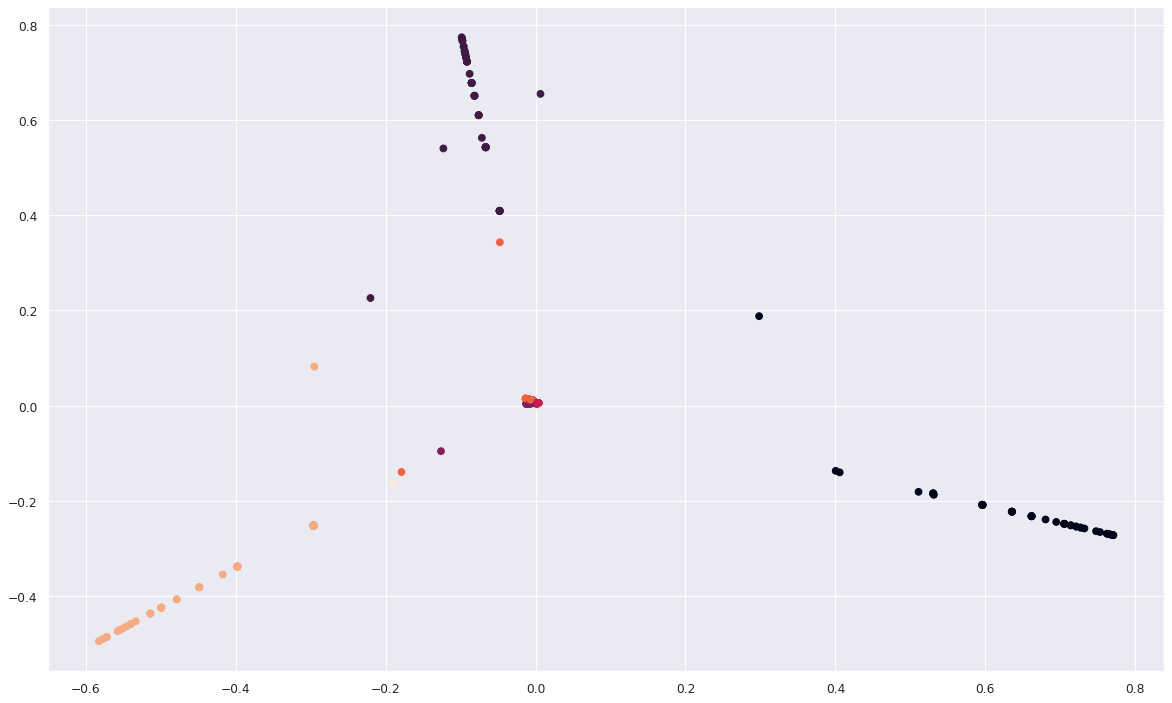

In [ ]:
X_pca = PCA().fit_transform(topics_data)

figure(num=None, figsize=(18, 11), dpi=80, facecolor='w', edgecolor='k')
scatter(X_pca[:, 0], X_pca[:, 1], c= color )

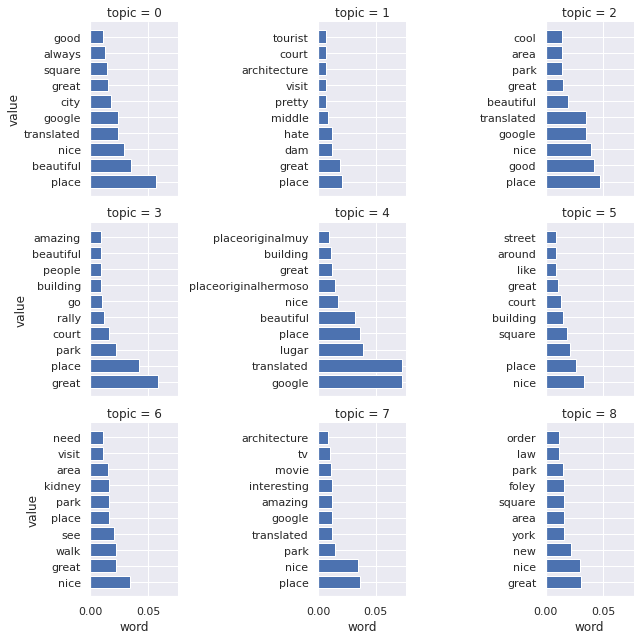

In [ ]:
import seaborn as sns

g = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
g.map(plt.barh, "word", "value")